In [475]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [476]:
df1=pd.read_csv("ttrain.csv")

In [477]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [478]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [479]:
df2=pd.read_csv("ttest.csv")
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [480]:
df1.shape , df2.shape

((891, 12), (418, 11))

In [481]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C


In [482]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
385,1277,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.0,NaN,S


In [483]:
df=df1.append(df2)

In [484]:
df.shape

(1309, 12)

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [486]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [487]:
df["Fare"].mean()

33.29547928134557

In [488]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [489]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [490]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [491]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [492]:
df["Embarked"]=df["Embarked"].fillna("S")

In [493]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

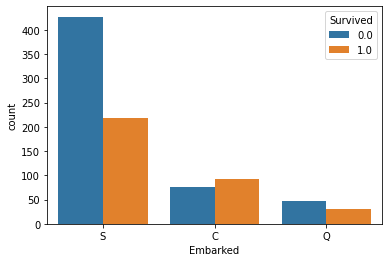

In [494]:
sns.countplot(x='Embarked',hue="Survived",data=df)

In [495]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
712,713,1.0,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
344,345,0.0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
804,805,1.0,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [496]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)

In [497]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [498]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [499]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Rev","Johkheer","Don","Sir","Col","Major","Dr","Capt"],"Mr")
                                

In [500]:
df["Title"].value_counts()

Mr          782
Miss        264
Mrs         201
Master       61
Jonkheer      1
Name: Title, dtype: int64

In [501]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [502]:
1014/1309

0.774637127578304

In [503]:
del df["Cabin"]  #yüzde 20sinden fazlası boşsa silebiliriz.

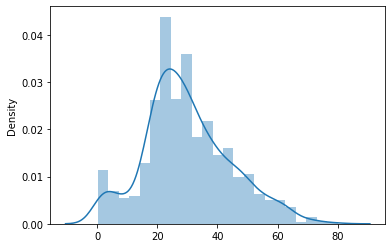

In [504]:
sns.distplot(x=df.Age);

In [505]:
df["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [506]:
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [507]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median")) #orta değer

In [508]:
df["Family"]=df["SibSp"]+df["Parch"]+1

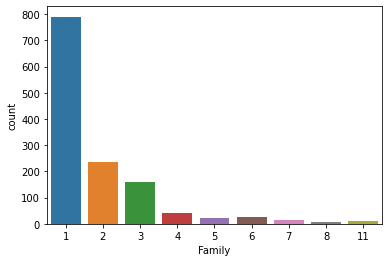

In [509]:
sns.countplot(df['Family']);

In [510]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Family           0
dtype: int64

In [511]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [512]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
192,1.0,3,female,19.0,1,0,7.8542,S,Miss,2


In [513]:
data=pd.get_dummies(df,drop_first=True)

In [514]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,0,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,0,1,0


In [515]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
Survived,1.000000,-0.338481,-0.075808,-0.035322,0.081629,0.257307,0.016639,-0.543351,0.003650,-0.149683,0.085221,0.335636,-0.561796,0.347864
Pclass,-0.338481,1.000000,-0.386723,0.060832,0.018322,-0.558477,0.050027,0.124617,0.230491,0.091320,0.095257,0.025350,0.080726,-0.190444
Age,-0.075808,-0.386723,1.000000,-0.216262,-0.132567,0.177429,-0.214705,0.067732,-0.057223,-0.033856,-0.407885,-0.293929,0.242740,0.234049
SibSp,-0.035322,0.060832,-0.216262,1.000000,0.373587,0.160224,0.861952,-0.109609,-0.048678,0.073709,0.329171,0.075519,-0.248492,0.062537
Parch,0.081629,0.018322,-0.132567,0.373587,1.000000,0.221522,0.792296,-0.213125,-0.100943,0.071881,0.253482,0.064589,-0.317027,0.212113
Fare,0.257307,-0.558477,0.177429,0.160224,0.221522,1.000000,0.226465,-0.185484,-0.130054,-0.169894,0.011596,0.090101,-0.185297,0.146365
Family,0.016639,0.050027,-0.214705,0.861952,0.792296,0.226465,1.000000,-0.188583,-0.087190,0.087771,0.355061,0.084976,-0.336724,0.157068
Sex_male,-0.543351,0.124617,0.067732,-0.109609,-0.213125,-0.185484,-0.188583,1.000000,-0.088651,0.115193,0.164375,-0.676028,0.902432,-0.572861
Embarked_Q,0.003650,0.230491,-0.057223,-0.048678,-0.100943,-0.130054,-0.087190,-0.088651,1.000000,-0.491656,-0.009091,0.203538,-0.082646,-0.108114
Embarked_S,-0.149683,0.091320,-0.033856,0.073709,0.071881,-0.169894,0.087771,0.115193,-0.491656,1.000000,0.018297,-0.115222,0.104603,-0.026138


In [516]:
train=data[:891]
test=data[891:]

In [517]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,0,1,0


In [518]:
x=train.drop("Survived",axis=1)
y=train["Survived"]

In [519]:
test=test.drop("Survived",axis=1)

In [520]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [521]:
g.fit(x,y)

GaussianNB()

In [522]:
tahmin1=g.predict(test)

In [523]:
tahmin1.shape

(418,)

In [524]:
sonuc1=df2[["PassengerId"]]

In [525]:
sonuc1["Survived"]=tahmin1

In [526]:
sonuc1["Survived"]=sonuc1["Survived"].astype("int32")

In [527]:
sonuc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [528]:
sonuc1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [529]:
sonuc1.to_csv("titanic_tahmin1.csv",index=False)

In [530]:
b=BernoulliNB()
b.fit(x,y)

BernoulliNB()

In [531]:
tahmin2 = b.predict(test)


In [532]:
sonuc2 = df2[["PassengerId"]]

In [533]:
sonuc2["Survived"] = tahmin2

In [534]:
sonuc2

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [535]:
sonuc2['Survived']=sonuc2['Survived'].astype('int32')

In [536]:
sonuc2.to_csv("titanic_tahmin2.csv",index=False)

In [537]:
k=KNeighborsClassifier()
k.fit(x,y)

KNeighborsClassifier()

In [538]:
tahmin3=k.predict(test)

In [539]:
sonuc3=df2[["PassengerId"]]
sonuc3["Survived"] = tahmin3
sonuc3

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [540]:
sonuc3['Survived']=sonuc3['Survived'].astype('int32')

In [541]:
sonuc3.to_csv("titanic_tahmin3.csv",index=False)

In [542]:
d=DecisionTreeClassifier()
d.fit(x,y)

DecisionTreeClassifier()

In [543]:
tahmin4 = d.predict(test)

In [544]:
sonuc4=df2[["PassengerId"]]
sonuc4["Survived"] = tahmin4
sonuc4

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [545]:
sonuc4['Survived']=sonuc4['Survived'].astype('int32')

In [546]:
sonuc4.to_csv("titanic_tahmin4.csv",index=False)

In [547]:
r=RandomForestClassifier()
r.fit(x,y)

RandomForestClassifier()

In [548]:
tahmin5=r.predict(test)

In [549]:
tahmin5

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [550]:
sonuc5=df2[["PassengerId"]]
sonuc5["Survived"] = tahmin5
sonuc5

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [551]:
sonuc5['Survived']=sonuc5['Survived'].astype('int32')

In [552]:
sonuc5.to_csv("titanic_tahmin5.csv",index=False)

In [553]:
h=GradientBoostingClassifier()
h.fit(x,y)

GradientBoostingClassifier()

In [554]:
tahmin6=h.predict(test)

In [555]:
tahmin6

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [556]:
sonuc6=df2[["PassengerId"]]
sonuc6["Survived"] = tahmin6
sonuc6

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [557]:
sonuc6['Survived']=sonuc6['Survived'].astype('int32')

In [558]:
sonuc6.to_csv("titanic_tahmin6.csv",index=False)

### Creating y_test to getting classification reports

In [559]:
df = pd.read_csv("titanic.csv")

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [561]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [562]:
df.survived = df.survived.fillna(0.0)

In [563]:
y_test = df[892:]["survived"]
y_test

892     0.0
893     0.0
894     1.0
895     1.0
896     0.0
       ... 
1305    0.0
1306    0.0
1307    0.0
1308    0.0
1309    0.0
Name: survived, Length: 418, dtype: float64

In [564]:
y_test.to_csv("y_test.csv",header=False,index=False)

In [565]:
y_test.shape

(418,)

In [566]:
y_test

892     0.0
893     0.0
894     1.0
895     1.0
896     0.0
       ... 
1305    0.0
1306    0.0
1307    0.0
1308    0.0
1309    0.0
Name: survived, Length: 418, dtype: float64

In [567]:
y_test = pd.read_csv("y_test.csv",header=None)

In [568]:
tahmin6.shape

(418,)

In [569]:
print(classification_report(tahmin6,y_test))

              precision    recall  f1-score   support

         0.0       0.64      0.74      0.68       270
         1.0       0.33      0.24      0.28       148

    accuracy                           0.56       418
   macro avg       0.48      0.49      0.48       418
weighted avg       0.53      0.56      0.54       418



In [570]:
print(classification_report(tahmin5,y_test))

              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68       256
         1.0       0.40      0.26      0.31       162

    accuracy                           0.56       418
   macro avg       0.51      0.50      0.49       418
weighted avg       0.53      0.56      0.54       418



In [571]:
print(classification_report(tahmin4,y_test))

              precision    recall  f1-score   support

         0.0       0.60      0.76      0.67       247
         1.0       0.43      0.27      0.33       171

    accuracy                           0.56       418
   macro avg       0.52      0.51      0.50       418
weighted avg       0.53      0.56      0.53       418



In [572]:
print(classification_report(tahmin3,y_test))

              precision    recall  f1-score   support

         0.0       0.62      0.75      0.67       257
         1.0       0.39      0.25      0.31       161

    accuracy                           0.56       418
   macro avg       0.50      0.50      0.49       418
weighted avg       0.53      0.56      0.53       418



In [573]:
print(classification_report(tahmin2,y_test))

              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64       245
         1.0       0.38      0.23      0.29       173

    accuracy                           0.52       418
   macro avg       0.48      0.48      0.46       418
weighted avg       0.49      0.52      0.50       418



In [574]:
print(classification_report(tahmin1,y_test))

              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64       243
         1.0       0.38      0.23      0.28       175

    accuracy                           0.52       418
   macro avg       0.47      0.48      0.46       418
weighted avg       0.49      0.52      0.49       418

